### Contexto

---

Rede Neural do tipo Perceptron de Multíplas Camadas com 3 entradas $x_1$, $x_2$ e $x_3$ e 10 neurônios em uma camada intermediária e um único neurônio na camada de saída para $y$

<img src="Fig/EPC5_Topologia_MLP_Projeto1.jpg" width="600">


### Bibliotecas utilizadas

---

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Tratamento dos dados

---

In [2]:
# Leitura dos dados

data = pd.read_csv('data_58_RNA.txt', delim_whitespace=True)

In [3]:
data

,x1,x2,x3,d
0,0.8799,0.7998,0.3972,0.8399
1,0.5700,0.5111,0.2418,0.6258
2,0.6796,0.4117,0.3370,0.6622
3,0.3567,0.2967,0.6037,0.5969
4,0.3866,0.8390,0.0232,0.5316
...,...,...,...,...
195,0.0339,0.4669,0.1526,0.3250
196,0.0080,0.8988,0.4201,0.5404
197,0.9955,0.8897,0.6175,0.9360
198,0.7408,0.5351,0.2732,0.6949


In [163]:
# Separacao dos dados

x1 = data['x1'].copy()
x2 = data['x2'].copy()
x3 = data['x3'].copy()
X = pd.concat([x1, x2, x3], axis=1)

d = data['d'].copy()

In [161]:
# Verifica a normalizacao

min = X.values.min()
max = X.values.max()

print(f'min = {min} \n max = {max}')

min = 0.0 
 max = 1.0


Já normalizado

In [164]:
# Adiciona coluna do limiar de ativacao = -1 (bias) no conjunto de dados
X['bias'] = -1

In [165]:
X = np.array(X)

d = np.array(d)
d = d.reshape(-1, 1)

### Treinamento da rede neural MLP

---

In [511]:
# valor maximo de epocas
MAX_EPOCA = int(10e+6)

# Taxa de aprendizado
n = 0.1

# Precisao
p = 10e-6

Funcao logistica (sigmoide):

$f(u) = 1 / (1 + e^{(-β*u)})$

sendo $β$ o fator de inclinacao da funcao e $u$ a entrada

In [8]:
def func_ativacao(u, beta):

    g = 1 / (1 + np.exp(-beta * u))

    return g

In [ ]:
# Plot Funcao de Ativacao

u = np.arange(-5,5,0.1)
resultado = func_ativacao(u, 0.5)

plt.figure(figsize=(8, 6))
plt.plot(u, resultado, label='Função Sigmoide', linewidth=2)
plt.xlabel('u')
plt.ylabel('g(u)')
plt.title('Função de Ativação Sigmoide')
plt.grid(True)
plt.legend()
plt.show()

In [10]:
def func_ativacao_derivada(u, beta):
    
    gd = (beta * np.exp(-beta * u))/((np.exp(-beta * u) + 1) ** 2)

    return gd

In [ ]:
# Plot Funcao de Ativacao Derivada

u = np.arange(-5,5,0.1)
resultado = func_ativacao_derivada(u, 0.5)

plt.figure(figsize=(8, 6))
plt.plot(u, resultado, label='Função Sigmoide Derivada', linewidth=2)
plt.xlabel('u')
plt.ylabel('g(u)')
plt.title('Função de Ativação Sigmoide Derivada')
plt.grid(True)
plt.legend()
plt.show()

In [506]:
# X -> dados de entrada
# d -> saida desejada (alvo)
# n -> taxa de aprendizado
# MAX_EPOCA -> quantidade maxima de epcas de treinamento
# p -> precisao
# beta -> inclinacao das funcoes

def treinamento(X, d, n, MAX_EPOCA, p, beta):

    # Lista de matrizes de pesos sinapticos iniciais e ajustados
    lista_Wi_1 = []
    lista_Wi_2 = []
    lista_W_1_bp = []
    lista_W_2_bp = []

    for n_treino in range(5):

        print('-'*30)
        print(f'Treinamento numero: {n_treino + 1}')
        print('-'*30)
        
        # Contador de epocas
        epoca = 0

        # Vetor de erros
        erro = np.zeros(MAX_EPOCA)

        # Pesos aleatorios entre 0 e 1 do n_treino
        # (10, 4) -> (10 neuronios, 3 entradas + 1 bias)
        W_1 = np.random.randn(10,4)

        # Salva na tabela Wi_1
        lista_Wi_1.append(W_1)

        # Pesos aleatorios entre 0 e 1 do n_treino
        # (1, 11) -> (1 neuronios, 10 entradas + 1 bias)
        W_2 = np.random.randn(1, 11)

        # Salva na tabela Wi_2
        lista_Wi_2.append(W_2)

        while(epoca < MAX_EPOCA):

            # print(f'epoca {epoca}')

            #######################
            # ETAPAS FEED FORWARD #
            #######################
            
            # entradas I_1 e saida Y_1 da camada 1

            # Entrada I_1 = X * W_1
            I_1 = X.dot(W_1.T)

            # Saida Y_1 = g(I_1)
            Y_1 = func_ativacao(I_1, beta)
            
            # entrada I_2 e saida Y_2 da camada 2 de saída

            # Entrada I_2 = Y_1 * W_2 (do treino em questao)

            # Adicao do bias
            Y_1 = pd.DataFrame(Y_1)
            Y_1['bias'] = -1
            Y_1 = np.array(Y_1)

            I_2 = (Y_1).dot(W_2.T)

            # Saida Y_2 = g(I_2)
            Y_2 = func_ativacao(I_2, beta)

            # Erro da previsao FOWARD
            erro[epoca] = np.mean((d - Y_2) ** 2)
            
            ######################
            # ETAPAS DE BACKWARD #
            ######################

            # gradiente local em relacao ao j-esimo neuronio da camada 2 de saida (delta_2)

            gd_2 = func_ativacao_derivada(I_2, beta)

            erro_2 = d - Y_2

            delta_2 = erro_2*gd_2

            # ajuste de W_2
            
            corr_2 = ((n * delta_2).T).dot(Y_1)

            W_2_bp = W_2 + corr_2
            
            # gradiente local em relacao ao j-esimo neuronio da camada 1 (delta_1)

            gd_1 = func_ativacao_derivada(I_1, beta)

            delta_1 = (delta_2.dot(W_2_bp[:, :-1])) * gd_1

            # ajuste de W_1
            
            corr_1 = ((n * delta_1).T).dot(X)

            W_1_bp = W_1 + corr_1

            # print('-'*30)
            # print(f'Pesos ajustados - camada 1: \n {W_1_bp}')
            # print('-'*30)

            # Calculo da saida ajustada Y_2_bp

            I_1_bp = X.dot(W_1_bp.T)

            Y_1_bp = func_ativacao(I_1_bp, beta)

            # Adicao do bias
            Y_1_bp = pd.DataFrame(Y_1_bp)
            Y_1_bp['bias'] = -1
            Y_1_bp = np.array(Y_1_bp)

            I_1_bp = X.dot(W_1_bp.T)

            I_2_bp = (Y_1_bp).dot(W_2_bp.T)

            Y_2_bp = func_ativacao(I_2_bp, beta)

            # Erro da previsao PÓS-BACKWARD
            erro[epoca + 1] = np.mean((d - Y_2_bp) ** 2)

            # Incremente de epoca
            epoca = epoca + 1

            # print(f'epoca{epoca} - {abs(erro[epoca] - erro[epoca - 1])} < {p}')

            # Busca pela precisao
            if (abs(erro[epoca] - erro[epoca - 1]) < p):

                print(f'Convergência em {epoca} épocas')
                print(f'Erro Médio Quadrático = {np.mean(erro)}')

                # Armazena as matrizes de pesos sinapticos ajustados na lista
                lista_W_1_bp.append(W_1_bp)
                lista_W_2_bp.append(W_2_bp)
                
                # Grafico do erro
                plt.figure()
                plt.plot(np.arange(epoca+1), erro[:epoca+1], linewidth=1)
                ttl = f'Erro pelas épocas (Treinamento {n_treino + 1})'
                plt.title(ttl)
                plt.ylabel('Erro Quadrático Médio')
                plt.xlabel('Épocas')
                
                plt.xlim(0, epoca)
                plt.ylim(0, 1)
                plt.grid()
                plt.savefig(f'Fig/EPC5_n_treino{n_treino + 1}.pdf', format='pdf')
                plt.show()

                break

            # Atualiza as matrizes iniciais com as ajustadas
            W_1 = W_1_bp
            W_2 = W_2_bp

    return lista_Wi_1, lista_Wi_2, lista_W_1_bp, lista_W_2_bp

### Teste da rede neural

---

In [282]:
data_teste = pd.read_csv('data_teste_58_RNA.txt', delim_whitespace=True)

In [283]:
# Separacao dos dados de teste

x1_teste = data_teste['x1'].copy()
x2_teste = data_teste['x2'].copy()
x3_teste = data_teste['x3'].copy()
X_teste = pd.concat([x1_teste, x2_teste, x3_teste], axis=1)

# Adiciona coluna do limiar de ativacao = -1 (bias) no conjunto de dados
X_teste['bias'] = -1

d_teste = data_teste['d'].copy()

In [284]:
X_teste = np.array(X_teste)

d_teste = np.array(d_teste)
d_teste = d_teste.reshape(-1, 1)

In [419]:
def teste(X_teste, d_teste, lista_W_1_bp, lista_W_2_bp, beta):

    # Vetor de erros
    erro = np.zeros(5)

    # Vetor de variancia
    variancia = np.zeros(5)

    # Lista de previsao
    lista_Y_2 = []

    # contador -> c

    for n_teste in range(5):

        print('-'*30)
        print(f'Teste numero: {n_teste + 1}')
        print('-'*30)

        #######################
        # ETAPAS FEED FORWARD #
        #######################
        
        # entradas I_1 e saida Y_1 da camada 1

        I_1 = X_teste.dot(lista_W_1_bp[n_teste].T)

        Y_1 = func_ativacao(I_1, beta)

        # Adicao do bias
        Y_1 = pd.DataFrame(Y_1)
        Y_1['bias'] = -1
        Y_1 = np.array(Y_1)
        
        # entrada I_2 e saida Y_2 da camada 2 de saída

        I_2 = (Y_1).dot(lista_W_2_bp[n_teste].T)

        Y_2 = func_ativacao(I_2, beta)

        # Erro Relativo da previsao FOWARD
        erro[n_teste] = np.mean(((np.abs(d_teste - Y_2))/(np.abs(d_teste)))*100)

        # Variancia da previsao FOWARD
        variancia[n_teste] = (np.sum((d_teste - Y_2) ** 2))/(len(d_teste)-1)

        print(f'Erro Relativo Médio = {erro[n_teste]}')
        print(f'Variancia = {variancia[n_teste]}')

        lista_Y_2.append(Y_2)

    return lista_Y_2

### Resultados via aplicação

---

In [505]:
def grafico_dispersao(resultados):

    for c in range(5):
        # Calcular os resíduos
        resultados[f'Resíduos (T{c+1})'] = resultados[f'y (T{c+1})'] - resultados['d']
        
        # Criar um Gráfico de Dispersão de Resíduos
        plt.scatter(resultados['d'], resultados[f'Resíduos (T{c+1})'])
        
        # Adicionar uma linha horizontal no eixo zero na cor vermelha
        plt.axhline(0, color='red', linestyle='--')
        
        # Definir o tamanho do eixo y
        # plt.ylim(-0.5, 0.5)
        
        # Configurar os rótulos dos eixos e o título do gráfico
        plt.xlabel('Valor desejado (d)')
        plt.ylabel('Resíduos')
        plt.title(f'Gráfico de Dispersão de Resíduos - Teste {c+1}')
        
        plt.savefig(f'Fig/EPC5_Dispersao_erro{c + 1}.pdf', format='pdf')

        # Exibir o gráfico
        plt.show()

In [446]:
def app(X, d, n, MAX_EPOCA, p, beta, X_teste, d_teste, data_teste):

    resultados = data_teste.copy()

    lista_Wi_1, lista_Wi_2, lista_W_1_bp, lista_W_2_bp = treinamento(X, d, n, MAX_EPOCA, p, beta)

    data_calculada = teste(X_teste, d_teste, lista_W_1_bp, lista_W_2_bp, beta)

    for i, matriz in enumerate(data_calculada):

        resultados[f'y (T{i+1})'] = matriz

    tabela_dispersao = resultados.copy()

    grafico_dispersao(tabela_dispersao)

    return resultados

------------------------------
Treinamento numero: 1
------------------------------
Convergência em 83 épocas
Erro Médio Quadrático = 3.6360241812905244e-07


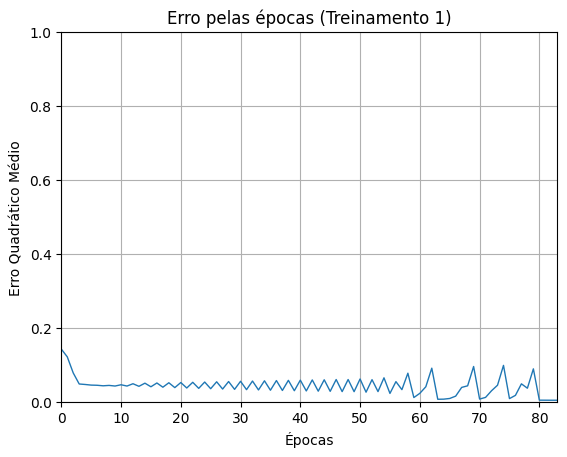

------------------------------
Treinamento numero: 2
------------------------------
Convergência em 464 épocas
Erro Médio Quadrático = 2.2543189462597732e-06


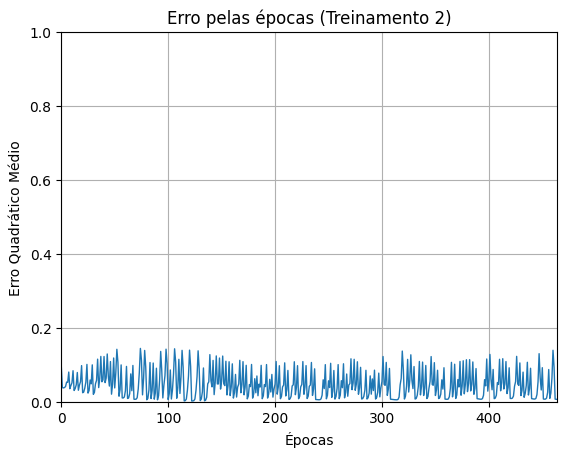

------------------------------
Treinamento numero: 3
------------------------------
Convergência em 110 épocas
Erro Médio Quadrático = 4.26566349493398e-07


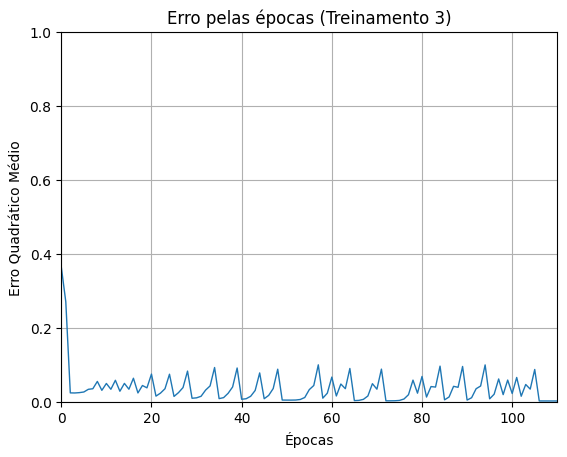

------------------------------
Treinamento numero: 4
------------------------------
Convergência em 807 épocas
Erro Médio Quadrático = 3.885562782981215e-06


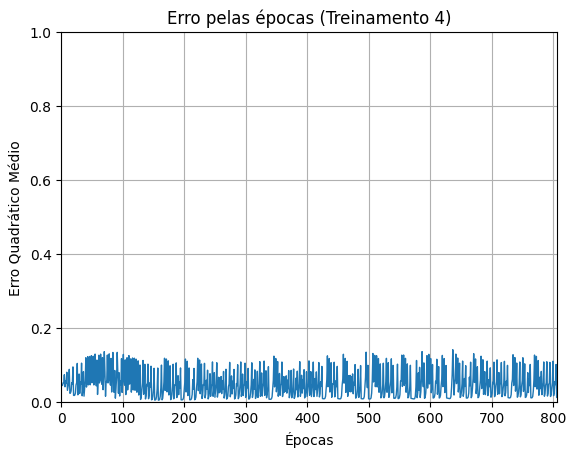

------------------------------
Treinamento numero: 5
------------------------------
Convergência em 90 épocas
Erro Médio Quadrático = 3.5603455975846174e-07


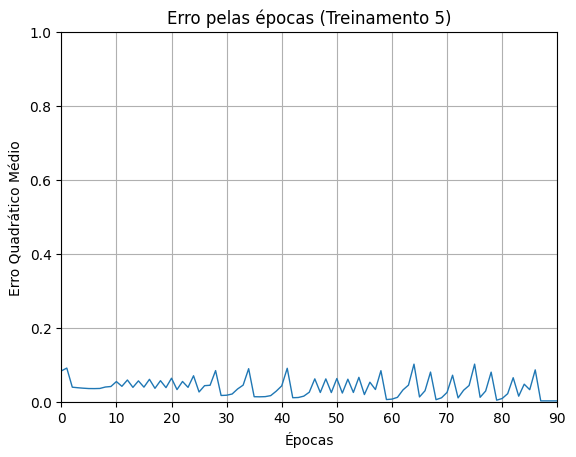

------------------------------
Teste numero: 1
------------------------------
Erro Relativo Médio = 6.537418486350669
Variancia = 0.0022580387551525867
------------------------------
Teste numero: 2
------------------------------
Erro Relativo Médio = 10.57477580698895
Variancia = 0.0042715323428569
------------------------------
Teste numero: 3
------------------------------
Erro Relativo Médio = 5.03836579868303
Variancia = 0.0010665621530515116
------------------------------
Teste numero: 4
------------------------------
Erro Relativo Médio = 17.466624419608507
Variancia = 0.010458681199943266
------------------------------
Teste numero: 5
------------------------------
Erro Relativo Médio = 1.7838950404590903
Variancia = 0.00021980433703806717


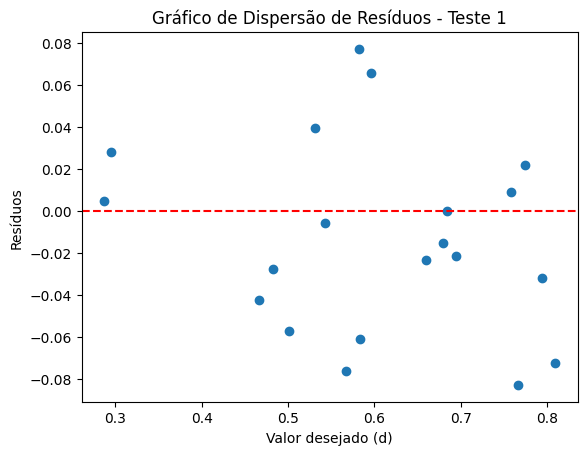

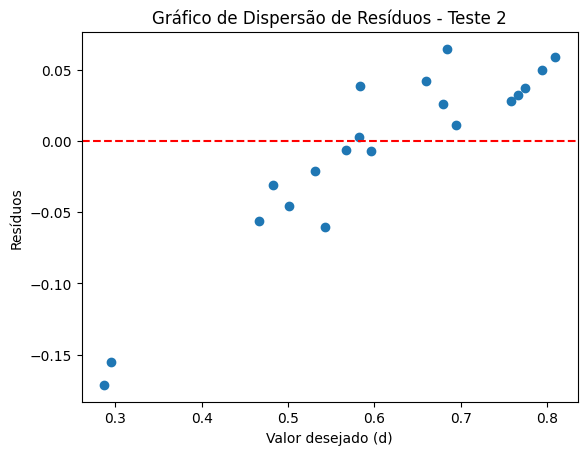

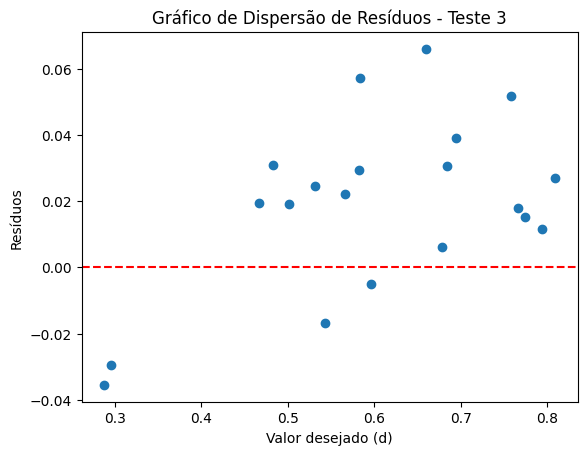

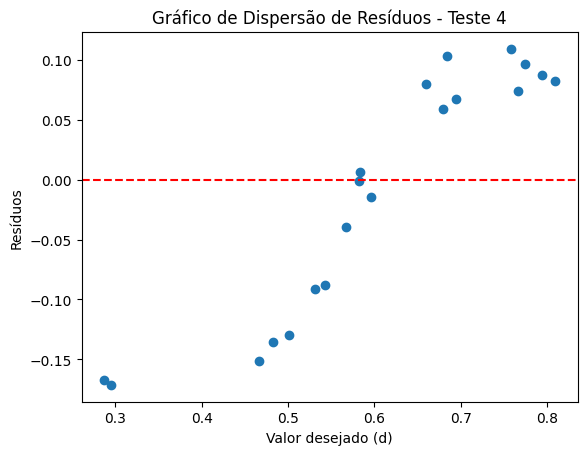

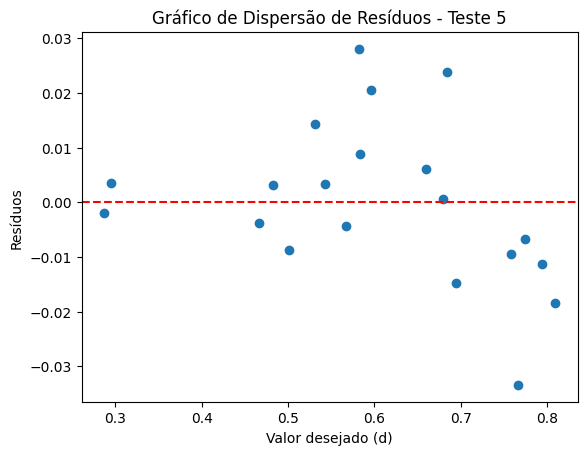

In [523]:
tabela_final = app(X, d, n, MAX_EPOCA, p, 0.75, X_teste, d_teste, data_teste)

In [524]:
tabela_final.head(20)

,x1,x2,x3,d,y (T1),y (T2),y (T3),y (T4),y (T5)
0,0.0611,0.2860,0.7464,0.4831,0.455360,0.452362,0.513907,0.348031,0.486277
1,0.5102,0.7464,0.0860,0.5965,0.662386,0.589125,0.591570,0.581767,0.617096
2,0.0004,0.6916,0.5006,0.5318,0.571493,0.510595,0.556441,0.440350,0.546091
3,0.9430,0.4476,0.2648,0.6843,0.684590,0.748834,0.715005,0.787211,0.708050
4,0.1399,0.1610,0.2477,0.2872,0.292176,0.115899,0.251680,0.120448,0.285227
5,0.6423,0.3229,0.8567,0.7663,0.683588,0.798187,0.784143,0.840087,0.732884
6,0.6492,0.0007,0.6422,0.5666,0.490580,0.560498,0.588619,0.527033,0.562162
7,0.1818,0.5078,0.9046,0.6601,0.636748,0.701859,0.726033,0.739597,0.666142
8,0.7382,0.2647,0.1916,0.5427,0.537304,0.482155,0.525995,0.455155,0.545940
9,0.3879,0.1307,0.8656,0.5836,0.522834,0.621877,0.640807,0.590311,0.592338


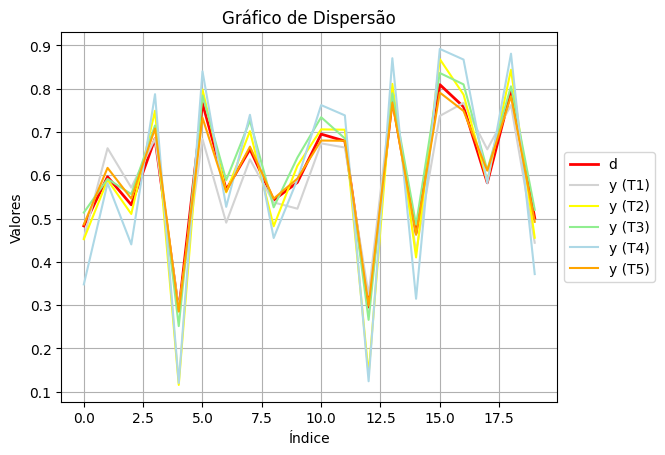

In [526]:
cores = {
    'd': 'red',
    'y (T1)': 'lightgray',
    'y (T2)': 'yellow',
    'y (T3)': 'lightgreen',
    'y (T4)': 'lightblue',
    'y (T5)': 'orange',
}

colunas_excluidas = ['x1', 'x2', 'x3']
colunas_plot = [coluna for coluna in tabela_final.columns if coluna not in colunas_excluidas]

for coluna in colunas_plot:
    if coluna == 'd':
        plt.plot(tabela_final.index, tabela_final[coluna], label=coluna, c=cores.get(coluna, 'blue'), linewidth=2.0)
    else:
        plt.plot(tabela_final.index, tabela_final[coluna], label=coluna, c=cores.get(coluna, 'blue'))

plt.xlabel('Índice')
plt.ylabel('Valores')
plt.title('Gráfico de Dispersão')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Move a legenda para fora da imagem
plt.grid(True)

plt.savefig(f'Fig/EPC5_Dispersao_d_y.jpg', format='jpg')
plt.show()